# Numerical Python e Richiami di Statistica


Python è un linguaggio estremamente versatile, ma non brilla per velocità.
Nonostante esistano molti *workaround* per rendere Python più veloce, nessuno consente di raggiungere la velocità dei linguaggi compilati, ed in particolare del C.

Il motivo principale per il quale il Python è lento è che ogni volta che incontra una variabile, deve riverificarne il tipo e interagire con una interfaccia di alto livello composta da operatori e funzioni indicate da parole (e non da indirizzi di memoria, come nel caso dei linguaggi compilati).

La soluzione ovvia è *scrivere le parti di codice in cui abbiamo bisogno di velocità* in C, e collocarle all'interno di un programma Python.
Tutto sommato, Python stesso è scritto in C, quindi concettualmente non è difficile tradurre oggetti Python in C e viceversa.

In questo corso, non abbiamo il tempo per studiare come si collocano funzioni scritte in C all'interno di un programma Python, e ci accontenteremo delle funzioni scritte da altri.

In particolare, considereremo un pacchetto, che si chiama `numpy` che definisce un tipo di dato `array` ed una serie di operazioni tra `array` che hanno una traduzione diretta in C.

Per utilizzare `numpy` è necessario prima di tutto importarlo nel notebook.  
Solitamente, si preferisce abbreviare  `numpy` in `np` per risparmiare qualche carattere.

In [ ]:
import numpy as np

Per valutare la differenza di tempo tra implementazioni in puro Python e utilizzando le funzioni C messe a disposizione tramite numpy, introduciamo anche la parola magica `timeit` che nei notebook di Python consente di valutare il tempo necessario ad eseguire una singola cella.

Ad esempio il tempo necessario per sommare tutti i numeri da uno a cento milioni in Python puro si può ottenere come

In [ ]:
%%time
total = 0
for i in range(100_000_000):
  total += i
print (total)

4999999950000000
CPU times: user 11.7 s, sys: 3.52 ms, total: 11.7 s
Wall time: 11.8 s


Lo stesso calcolo effettuato con le librerie di `numpy` richiede quasi due ordini di grandezza in meno in termini di tempo di calcolo:

In [ ]:
%%time
print (np.sum(np.arange(100_000_000)))

4999999950000000
CPU times: user 241 ms, sys: 434 ms, total: 676 ms
Wall time: 697 ms


In questo esempio, abbiamo sostituito a `range` con il suo equivalente `numpy`  (`np.arange`) che crea un array con una sequenza di numeri definiti dalla la stessa sintassi di `range`:

In [ ]:
print ("from 0 to 3 (excluded) with step 1", np.arange(3))
print ("from 2 to 5 (excluded) with step 1", np.arange(2, 5))
print ("from 0 to 5 (excluded) with step 2", np.arange(0, 5, 2))

from 0 to 3 (excluded) with step 1 [0 1 2]
from 2 to 5 (excluded) with step 1 [2 3 4]
from 0 to 5 (excluded) with step 2 [0 2 4]


La documentazione di `numpy` è abbondante e molto curata, quindi si rimanda alla [documentazione ufficiale](https://numpy.org/doc/stable/user/quickstart.html) per un'introduzione sistematica, e si procede qui per esempi.

### Alcune semplici operazioni tra array

Aritmetica tra array

In [ ]:
a1 = np.array((1,2,3))
a2 = np.array((2,3,4))
print (a1 + a2) ## Sum
print (a1 - a2) ## Difference
print (a1 * a2) ## Product
print (a1 / a2) ## Division
print (a1**2)   ## Power

[3 5 7]
[-1 -1 -1]
[ 2  6 12]
[0.5        0.66666667 0.75      ]
[1 4 9]


Alcune funzioni di singola variabile possono essere eseguite su ciascun elemento dell'array

In [ ]:
print (np.log (a1))
print (np.exp (a2))
print (np.power (a1,2))

[0.         0.69314718 1.09861229]
[ 7.3890561  20.08553692 54.59815003]
[1 4 9]


Alcune funzioni (talvolta indicate come *riduzioni*) trasformano l'intero array (o porzioni di esso) in un singolo valore numerico (o in un array di dimensione più piccola). Ad esempio,

In [ ]:
a = np.array([1,2,3])
print ("1+2+3:", np.sum(a))
print ("1*2*3:", np.prod(a))

a = np.array ([
  [ 2, 2, 2 ],
  [ 3, 3, 3 ],
  [ 4, 4, 4 ]
])
print ( "2+3+4, 2+3+4, 2+3+4:", np.sum (a, axis=0))
print ( "2+2+2, 3+3+3, 4+4+4:", np.sum (a, axis=1))

1+2+3: 6
1*2*3: 6
2+3+4, 2+3+4, 2+3+4: [9 9 9]
2+2+2, 3+3+3, 4+4+4: [ 6  9 12]


Gli array di valori booleani possono anche essere usati come "maschere" per selezionare alcuni elementi da un array, ad esempio

In [ ]:
characters = np.array(["Mickey", "Minnie", "Pluto"])
n_legs     = np.array([    2   ,     2   ,     4   ])

print ("Boolean mask of characters with more than 2 legs:", n_legs > 2)

characters_with_more_than_2_legs = characters[n_legs>2]
print (characters_with_more_than_2_legs)

mask = n_legs > 2
print ("Characters ")

Boolean mask of characters with more than 2 legs: [False False  True]
['Pluto']
Characters 


Per contare il numero di elementi veri in un array di valori booleani, si utilizza l'istruzione [`np.count_nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html):

In [ ]:
a = np.arange(1000)
print ("Number of elements larger than 3: ", np.count_nonzero (a > 3))

Number of elements larger than 3:  996


## Array come vettori e matrici

Alcune operazioni tra array di numpy prendono spunto dalle operazioni tra vettori, tra matrici e tra tensori.
Ad esempio, consideriamo le matrici $I$ ed $M \in \mathbf {R}^{3\times3}$ ed i vettori $u$ e $v \in \mathbf {R}^{3}$.

Vediamo la conversione di alcuni operatori tra array di numpy che rappresentano questi elementi.

Operazioni elemento per elemento (*element-wise*):
 * `v+u` = $\{v_i\, + u_i\}_i \in \mathbf{R}^3$
 * `I+M` = $\{I_{ij}\, + M_{ij}\}_{ij} \in \mathbf{R}^{3\times3}$
 * `v*u` = $\{v_i\, u_i\}_i \in \mathbf{R}^3$
 * `I*M` = $\{I_{ij}\, M_{ij}\}_{ij} \in \mathbf{R}^{3\times3}$



In [ ]:
I = np.eye(3)
M = np.ones((3,3))
v = np.arange(1,4)
u = np.ones(3)

def format_shape (array):
  if len(array.shape) == 0:
    return "\nR"
  return f"\nR^{ 'x'.join([str(x) for x in array.shape])}\n"

print ("v+u\n", v+u, format_shape(v+u))
print ("v*u\n", v*u, format_shape(v*u))
print ("I+M\n", I+M, format_shape(I+M))
print ("I*M\n", I*M, format_shape(I*M))

v+u
 [2. 3. 4.] 
R^3

v*u
 [1. 2. 3.] 
R^3

I+M
 [[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]] 
R^3x3

I*M
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
R^3x3



 Operazioni con *broadcast*:
 * `I+u` = $\{I_{ij}\, + u_{j}\}_{ij} \in \mathbf{R}^{3\times3}$
 * `I*u` = $\{I_{ij}\, u_{j}\}_{ij} \in \mathbf{R}^{3\times3}$

In [ ]:
print ("I+v\n", I+v, format_shape(I+v))
print ("I*v\n", I*v, format_shape(I*v))

I+v
 [[2. 2. 3.]
 [1. 3. 3.]
 [1. 2. 4.]] 
R^3x3

I*v
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]] 
R^3x3



Operazioni tensoriali
 * `I@v` = $\{\sum_j I_{i,j}M_{j}\}_{i} \in \mathbf{R}^{3}$
 * `I@M` = $\{\sum_j I_{i,j}M_{j,k}\}_{ik} \in \mathbf{R}^{3\times3}$
 * `v@u` = $\sum_i v_i u_i = v \cdot u \in \mathbf{R}$

In [ ]:
print ("I@v\n", I@v, format_shape(I@v))
print ("I@M\n", I@M, format_shape(I@M))
print ("v@u", v@u)

I@v
 [1. 2. 3.] 
R^3

I@M
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
R^3x3

v@u 6.0


# Plot
Per poter discutere gli esempi di calcolo numerico, è utile avere a disposizione una libreria grafica che consenta di visualizzare come grafici i risultati delle diverse operazioni.

In Python esistono svariate opzioni per mostrare grafici in un notebook, il pacchetto più diffuso (e forse un tantino vetusto) è `pyplot` reso disponibile nel pacchetto `matplotlib` che nacque nel tentativo di conquistare il cuore degli utenti matlab. (Il che è l'origine di tutti i suoi difetti.)

Per utilizzare `pyplot` dobbiamo innanzi tutto importarlo.

Come per `numpy` anche per `pyplot` si è diffusa la convenzione di rinominarlo in `plt`.

In [ ]:
import matplotlib.pyplot as plt

Siamo pronti per il primo esempio, che sarà una parabola.

$$ y = x^2 + 2x + 1 $$

Per prima cosa definiamo l'asse delle $x$ come una tupla di numeri in sequenza da -10 a 10 (escluso) con passo 0.01.

Possiamo usare la `tuple comprehension` per definirla a partire dall'istruzione `range`.

In [ ]:
xAxis = tuple(0.01 * i for i in range (-1000, 1000))
print (xAxis)

(-10.0, -9.99, -9.98, -9.97, -9.96, -9.950000000000001, -9.94, -9.93, -9.92, -9.91, -9.9, -9.89, -9.88, -9.870000000000001, -9.86, -9.85, -9.84, -9.83, -9.82, -9.81, -9.8, -9.790000000000001, -9.78, -9.77, -9.76, -9.75, -9.74, -9.73, -9.72, -9.71, -9.700000000000001, -9.69, -9.68, -9.67, -9.66, -9.65, -9.64, -9.63, -9.620000000000001, -9.61, -9.6, -9.59, -9.58, -9.57, -9.56, -9.55, -9.540000000000001, -9.53, -9.52, -9.51, -9.5, -9.49, -9.48, -9.47, -9.46, -9.450000000000001, -9.44, -9.43, -9.42, -9.41, -9.4, -9.39, -9.38, -9.370000000000001, -9.36, -9.35, -9.34, -9.33, -9.32, -9.31, -9.3, -9.290000000000001, -9.28, -9.27, -9.26, -9.25, -9.24, -9.23, -9.22, -9.21, -9.200000000000001, -9.19, -9.18, -9.17, -9.16, -9.15, -9.14, -9.13, -9.120000000000001, -9.11, -9.1, -9.09, -9.08, -9.07, -9.06, -9.05, -9.040000000000001, -9.03, -9.02, -9.01, -9.0, -8.99, -8.98, -8.97, -8.96, -8.950000000000001, -8.94, -8.93, -8.92, -8.91, -8.9, -8.89, -8.88, -8.870000000000001, -8.86, -8.85, -8.84, -8.83, 

Dato x, possiamo allora definire y secondo la formula descritta sopra:

In [ ]:
y = tuple(x**2 + 2*x + 1 for x in xAxis)

Ed infine costruiamo il plot con `pyplot.plot`

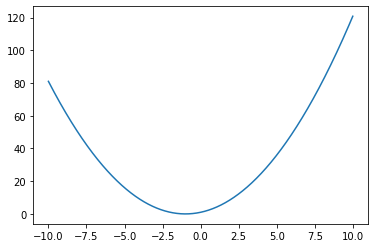

In [ ]:
plt.plot (xAxis, y)
plt.show()

Invece delle tuple, possiamo usare degli `array` di `numpy`.
La traduzione del codice sopra in array è

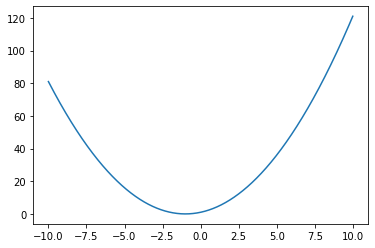

In [ ]:
x = np.linspace (-10, 10, 20001)   ## linspace syntax: (start, stop, n_points)
y = x**2 + 2*x + 1                 ## note that the class array defines operators in a way that this makes sense

plt.plot(x,y)
plt.show()

Il plot può essere abbellito e corredato di informazioni in modo abbastanza semplice

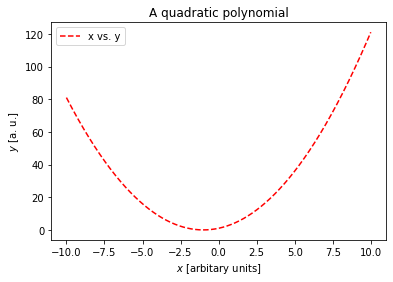

In [ ]:
plt.plot(x, y, 'r--', ## Sets the format as a red (r) dashed line (--)
         label = 'x vs. y',
         )
plt.xlabel ( "$x$ [arbitary units]" )
plt.ylabel ( "$y$ [a. u.]")
plt.title ("A quadratic polynomial")
plt.legend()
plt.show()

### Istogrammi
Partendo dall'esempio sopra, possiamo costruire un istogramma dei valori $y$.

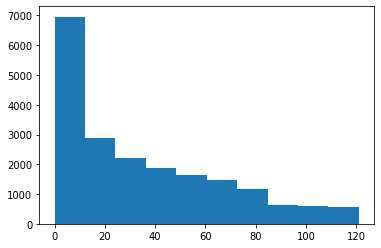

In [ ]:
plt.hist(y)
plt.show()

Anche se la funzione `hist` è abbastanza efficace nel determinare il range e dei dati che vogliamo mostrare, è solitamente una buona idea definire il binning manualmente.

Ad esempio, in questo caso possiamo decidere di avere 60 bin che coprano l'intervallo per $y \in [0, 120)$.

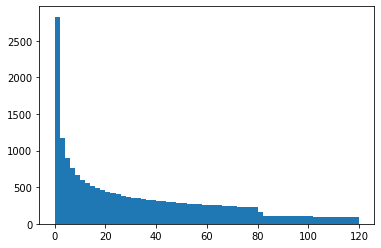

In [ ]:
boundaries = np.linspace (0, 120, 60+1)
plt.hist(y, bins=boundaries)
plt.show()

Per sovrapporre più elementi sullo stesso grafico, basta elencarli prima di `show`.

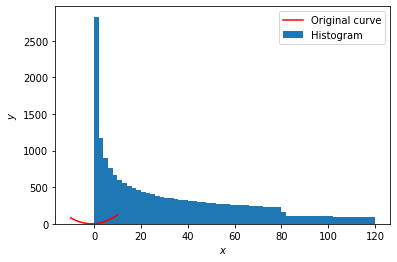

In [ ]:
plt.hist(y, bins=boundaries, label = "Histogram")
plt.plot(x, y, 'r-', label = "Original curve")
plt.xlabel ("$x$")
plt.ylabel ("$y$")
plt.legend()
plt.show()

# La distribuzione esponenziale

Cominciamo a discutere qualche esempio di applicazione numerica prendendo spunto dai concetti fondamentali di statistica.
Ricordiamo la funzione distribuzione di probabilità $f$ (*probability density function*, *pdf*) è una funzione che definisce la probabilità $P$ che una variabile aleatoria reale si trovi compresa in un intervallo infintesimo $\mathrm dx$ centrato nel punto x.

$$ P(x < X < x+\mathrm dx) = f(x)\mathrm dx$$

Come discusso nelle lezioni introduttive, ogni *pdf* è caratterizzata da due proprietà:
 * è definita positiva ($f(x) \geq 0\quad \forall x \in R$)
 * è normalizzata ($\int_{-\infty}^{\infty}f(x) \mathrm dx = 1$)

Consideriamo come esempio di *pdf*, la [distribuzione esponenziale](https://it.wikipedia.org/wiki/Distribuzione_esponenziale) che descrive, ad esempio, il tempo di decadimento di stati quantistici eccitati (ad esempio alcuni *nuclei radiattivi* ed alcune *particelle elementari*).

La distribuzione esponenziale è definita da
$$f_{\mathrm{exp}}(t) = \frac{\Theta(t)}{\tau}\exp\left(-\frac{t}{\tau}\right)$$

Dove $\Theta(t)$ è la [funzione a gradino di Heaviside](https://it.wikipedia.org/wiki/Funzione_gradino_di_Heaviside) pari a 1 per $t > 0$ e pari a 0 altrove e $\tau$ è il valor medio della distribuzione che rappresenta, ad esempio, il tempo caratteristico del decadimento.

Vediamo come definire in Python la *pdf* esponenziale:

In [ ]:
def exp_pdf (x, tau):
  return 1./tau * np.exp (-x/tau) * (x > 0)

E quindi rappresentiamola in un plot come discusso poco sopra.

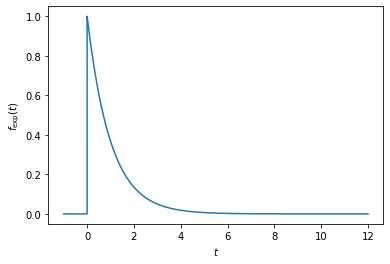

In [ ]:
xAxis = np.linspace(-1, 12, 1000001)
plt.plot(xAxis, exp_pdf(xAxis, 1))
plt.xlabel("$t$")
plt.ylabel("$f_{\exp} (t)$")
plt.show()

## Verifica delle proprietà
Per verificare che sia sempre definita positiva possiamo utilizzare la funzione `all` di numpy che verifica che una condizione sia verificata per *tutti* gli elementi di un `array`.
Oppure possiamo usare `any` sull'opzione inversa: se c'è almeno un elemento che non soddisfa la condizione, allora la condizione è falsa.

In [ ]:
print ("Is f_exp positive defined (with np.all)? ", np.all (exp_pdf(xAxis,1) >= 0) )
print ("Is f_exp positive defined (with np.any)? ", not np.any(exp_pdf(xAxis,1) < 0))

Is f_exp positive defined (with np.all)?  True
Is f_exp positive defined (with np.any)?  True


Passiamo a verificare la normalizzazione. Poiché numericamente non possiamo integrare fino ad infinito, dobbiamo accontentarci di una approssimazione, oppure dobbiamo verificare che nel limite in cui il limite superiore di integrazione tende a $+\infty$, allora il valore dell'integrale tende a 1.

Graficamente, possiamo mostrare la distribuzione cumulativa definita come
$$cdf(x) = \int_{-\infty}^{x} f(t) \mathrm dt$$
approssimando l'integrale con una somma
$$cdf(x) \simeq \sum_{t = 0}^{x} f(t) \Delta t $$

Se i valori $t$ che compaiono nella somma sono tra loro equidistanti, ossia se $\Delta t$ è costante al variare di $t$, possiamo scrivere
$$cdf(x) \simeq \Delta t\sum_{t = 0}^{x} f(t)$$

e tradurre in Python, utilizzando la funzione [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) (somma cumulativa) per rappresentare la sommatoria fino a $x$.


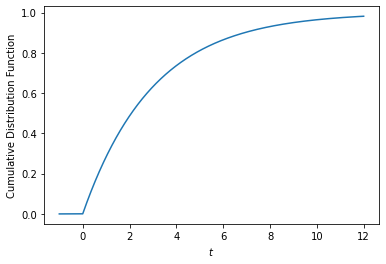

In [ ]:
## We compute \Delta t
dx = xAxis[1] - xAxis[0]

## We use the function cumsum (cumulative sum) and we mulyiply by \Delta t
cdf = dx * np.cumsum (exp_pdf(xAxis, tau=3))

## And then
plt.plot (xAxis, cdf)
plt.xlabel("$t$")
plt.ylabel("Cumulative Distribution Function")
plt.show()

La curva mostra un evidente asintoto orizzontale verso 1, verificando la normalizzazione della *pdf* esponenziale.

# Generatori Monte Carlo

Con [*Metodo Monte Carlo*](https://it.wikipedia.org/wiki/Metodo_Monte_Carlo) si fa riferimento ad una ampia gamma di metodi numerici basati sulla generazione di numeri casuali e l'analisi degli effetti che ciascun numero ha sul modello matematico preso in considerazione.

I metodi Monte Carlo sono ampiamente usati in fisica e in fisica delle alte energie per rappresentare gli effetti delle incertezze sperimentali (o talvolta intrinseche dei processi quantistici di produzione delle particelle) nelle simulazioni degli apparati sperimentali.

Ad esempio i metodi Monte Carlo vengono utilizzati:
 * per simulare i processi quantistici che intervengono nella collisione ad alta energia di particelle per simulare quali particelle verranno prodotte nella collisione (si vedano ad esempio [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html), [EPOS](https://arxiv.org/abs/1306.0121), [Hijing](https://arxiv.org/abs/nucl-th/9502021), ...)
 * per simulare i processi che intervengono nel decadimento delle particelle e l'oscillazione di *flavour* (ad esempio [EvtGen](https://evtgen.hepforge.org/))
 * per simulare l'interazione quantistica delle particelle con il materiale di cui è composto il rivelatore (ad esempio [Geant](https://geant4.web.cern.ch/node/1), [Fluka](http://www.fluka.org/fluka.php))
 * per simulare il processo di rivelazione che permette di correlare l'energia depositata ad un segnale elettrico, includendo eventualmente il rumore elettronico della catena di amplificazione e formazione del segnale.

Alla base di tutti i metodo Monte Carlo ci sono i generatori di numeri pseudo-casuali che consentano di generare numeri apparentemente casuali, ma in sequenze riproducibili (in modo da poter eseguire due volte esattamente lo stesso programma che è molto utile in fase di debug).
Inoltre un generatore di numeri pseudo-casuali è considerato un buon generatore se:
 * la correlazione tra numeri generati consecutivamente è piccola, cioè se è difficile prevedere la sequenza di numeri casuali data una sequenza parziale;
 * l'approssimazione con cui il campione generato si discosta dalla distribuzione uniforme è piccola;
 * il tempo necessario per fornire il numero successivo in una sequenza è piccolo.

In Python, si possono generare numeri casuali con l'istruzione [`np.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html), che rappresenta un accettabile compromesso tra i requisiti discussi sopra. Python consente (e raccomanda per applicazioni dove è rilevate un buon generatore) di scegliere con più cura tra le diverse opzioni disponibili. Si veda una discussione [qui](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator).

Per i nostri scopi introduttivi, il generatore *standard* è perfetto ed ignoreremo le sue limitazioni. Infatti, useremo i generatori di numeri casuali per studiare algoritmi e tecniche che poi applicheremo su dati reali. In generale nella parte di analisi dati è difficile che i difetti di un generatore di numeri casuali (fatta eccezione per la correlazione che può fare disastri) introducano errori significativi rispetto agli errori statistici o sistematici sulle quantità misurate, ma può essere utile confrontare i risultati ottenuti con generatori diversi per fugare ogni dubbio.


Vediamo come generare un campione di numeri casuali, distribuiti uniformemente nell'intervallo $[0, 1)$.

In [ ]:
## Generating a single value in range 0-1
x = np.random.uniform()

## Generating 10000 values in the default range 0-1
x = np.random.uniform(size=10_000)

## Generating 10M values in the explicited range 0-1
x = np.random.uniform(low=0, high=1, size=10_000_000)

Se mettiamo questi valori in un istogramma, ci aspettiamo che tutti i bin compresi tra zero e uno mostrino la stessa frequenza di estrazioni, mentre al di fuori di zero e uno, non se ne dovrebbe osservare nessuna.

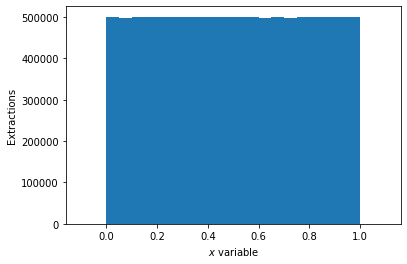

In [ ]:
plt.hist(x, np.linspace(-0.1, 1.1, 25))
plt.ylabel ("Extractions")
plt.xlabel ("$x$ variable")
plt.show()

### Il metodo del campionamento per reiezione
Il [metodo del campionamento per reiezione](https://it.wikipedia.org/wiki/Rejection_sampling), chiamato anche *rejection sampling*, *accept-reject* o simili, è un metodo semplice di generazione di numeri casuali secondo una certa distribuzione.
Particolarmente inefficiente per distribuzioni unidimensionali e che presentano lunghe code o picchi molto stretti, è stato considerato per molti anni come l'unica opzione percorribile per generare dati in molte dimensioni (oggi le reti neurali offrono un'alternativa più efficiente anche se meno affidabile).

Il principio su cui si basa questo metodo proviene dalla definizione di `pdf`.
 1. Si genera un valore $x$ per la variabile aleatoria secondo la distribuzione uniforme
 2. Si genera un valore $y$ compreso tra 0 e il massimo della *pdf* $f$
 3. Se $y < f(x)$, il valore per $x$ viene accettato, altrimenti viene scartato.

Poiché $y$ è distribuito in modo uniforme, la probabilità che venga accettato il valore $x$ è proporzionale a $f(x)$, e tanto basta a garantire che la distribuzione dei valori accettati segua la funzione distribuzione di probabilità $f(x)$.

Vediamo un esempio in Python.

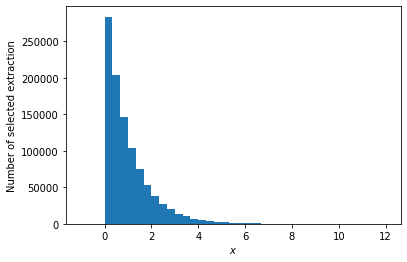

In [ ]:
## Let's start generating the sample of proposed values for x
## between 0 and 10
x = np.random.uniform(low=0, high=10, size=10_000_000)
## Then we campute the maximum value of the pdf
max_exp = np.max (exp_pdf(xAxis, 1))
## And extract, for each value of x, a random number y in range 0-max_exp
y = np.random.uniform (0, max_exp, size=x.size)
## We accept all and only those x values for which y is smaller than f(x)
x_passed = x[y < exp_pdf(x, 1)]

## And then we plot the result
plt.hist (x_passed, np.linspace(xAxis[0], xAxis[-1], 40))
plt.xlabel ("$x$")
plt.ylabel ("Number of selected extraction")
plt.show()

## Il metodo dell'inverso della cumultiva

Un altro metodo ampiamente utilizzato per la generazione di numeri casuali è il metodo dell'[inverso della cumulativa](https://en.wikipedia.org/wiki/Inverse_transform_sampling).

Si rimanda al libro di Glen Cowan per la dimostrazione, limitandoci qui ad un richiamo. Se $x$ è una varabile aleatoria distribuita uniformemente sull'intervallo $[0,1)$, $f(x)$ una distribuzione di probabilità (pdf) generica ed $F(x)$ la sua cumulativa (cdf), allora la variabile
$$ y = F^{-1}(x) $$
è una variabile aleatoria distribuita secondo $f(x)$.



Per implementare questo metodo con la funzione esponenziale cominciamo con il determinare la funzione inversa della cumulativa della distribuzione esponenziale.

$$F(x) = \int_0^x \frac{1}{\tau} \exp \left(-\frac{t}{\tau}\right)\, \mathrm dt $$
$$F(x) = \left[ - \exp\left(-\frac{x}{\tau}\right) \right]_0^x$$
$$F(x) = 1 - \exp\left(-\frac{x}{\tau}\right)$$
$$F^{-1}(x) = -\tau \log(1 - x)$$

Ed implementiamola e disegnamola in Python

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


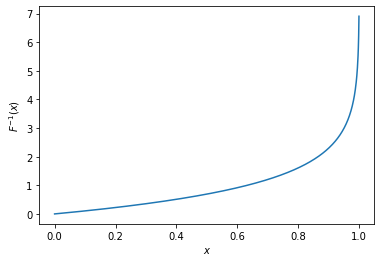

In [ ]:
def exp_cinv (x, tau):
  return - tau * np.log (1-x)

xAxis = np.linspace(0,1,1000)
plt.plot ( xAxis, exp_cinv(xAxis, 1) )
plt.xlabel ("$x$")
plt.ylabel ("$F^{-1}(x)$")
plt.show()

Quindi generiamo un campione di numeri pseudocasuali nell'intervallo $[0, 1)$ e per ciascuno di quei punti calcoliamo $F^{-1}(x)$.

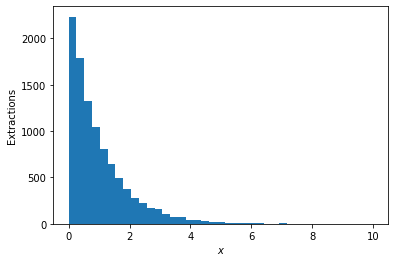

In [ ]:
x = np.random.uniform(size=10000)
plt.hist(exp_cinv(x, 1), bins = np.linspace(0, 10, 40))
plt.xlabel ("$x$")
plt.ylabel ("Extractions")
plt.show()

Possiamo sovrapporre all'istogramma il grafico della *pdf* originale.
Perché istogramma e *pdf* si sovrappongano dobbiamo trasformare la *pdf* in una funzione che predica il numero di estrazioni per bin.
Quindi,
$$N(x) = P(x < X < x+\Delta x) \ N_{\mathrm{tot}}$$
ossia
$$N(x) = f(x)\ \Delta x\ N_{\mathrm{tot}} $$

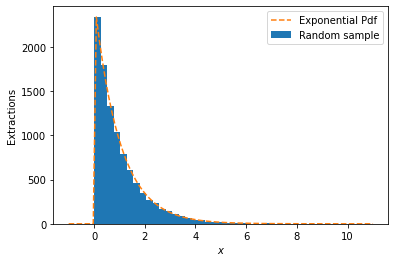

In [ ]:
x = np.random.uniform(size=10000)
boundaries = np.linspace(0, 10, 40)
plt.hist(exp_cinv(x, 1), bins=boundaries, label='Random sample')
delta_x = (boundaries[-1]-boundaries[0])/39

xAxis = np.linspace(-1,11,100)
Ntot = x.size
plt.plot(xAxis, exp_pdf(xAxis, 1)*Ntot*delta_x, '--', label='Exponential Pdf')
plt.legend()
plt.xlabel ("$x$")
plt.ylabel ("Extractions")
plt.show()

# Consistenza di un estimatore

Vediamo un esempio di semplice analisi statistica considerando la definizione di consistenza di un estimatore. Ricordiamo che un estimatore $T_N$ è consistente se
$$ \lim_{N \to +\infty} (T_N - \theta) < \varepsilon \qquad \forall \epsilon > 0 $$
dove $\theta$ è il valore vero della variabile stimata.

Consideriamo come esempio la media di $N$ variabili aleatorie distribuite secondo la distribuzione uniforme tra zero e uno.

Il valor medio della distribuzione uniforme è
$$
\mu = \int_0^1 x \mathrm dx = \frac{1}{2}
$$
Mentre la varianza della distribuzione uniforme è
$$
\sigma^2 = \int_0^1 \left( x - \frac{1}{2}\right)^2 \mathrm dx =
\left[ \frac{x^3}{3} - \frac{x^2}{2} + \frac{x}{4}\right]_0^1 = \frac{1}{12}
$$
La varianza della media $\mu = \frac{1}{N}\sum_{i = 1}^{N} x_i$ diventerà dunque
$$\sigma_\mu^2 = \frac{\sigma^2}{N} = \frac{1}{12N}$$

Verifichiamo con un cosiddetto *pseudoesperimento*.

Calcoliamo la media di `n` numeri casuali con `n` pari a $10^2, 10^3, 10^4,$ e $10^5$ campioni. Salviamo ciascun valor medio in una lista di valori medi e rappresentiamo in un grafico i valori medi in funzione del numero di campioni che hanno contribuito a formare la media.

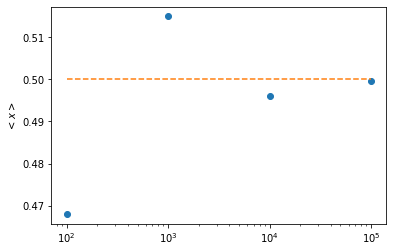

In [ ]:
## Define a tuple of sample sizes to study the evolution towards N -> +inf
n_samples = 100, 1_000, 10_000, 100_000

## Define a list results, one for each n in n_samples
average = []

## For each n in n_samples generates n random samples uniformly distributed in 0, 1
for n in n_samples:
  x = np.random.uniform (size=n)
  average.append (np.mean(x))

## Plots the averages as a function of the number of samples
plt.plot (n_samples, average, 'o')
plt.plot ((n_samples[0], n_samples[-1]), (0.5, 0.5), '--')
plt.xscale('log')
plt.ylabel ("$<x>$")
plt.show()

Ripetiamo quindi l'esperimento molte volte (30) e vediamo che, sistematicamente, per valori di $N$ più grandi, il valore della media si avvicina alla media teorica di $\frac12$.


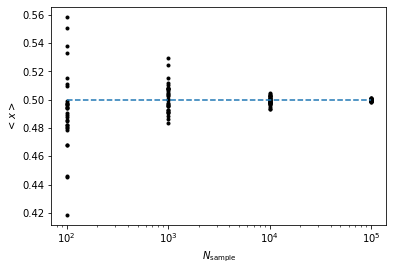

In [ ]:
n_samples = 100, 1_000, 10_000, 100_000
## Repeat the experiment described above for 30 times
for attmpt in range(30):
  average = []
  for n in n_samples:
    x = np.random.uniform (size=n)
    average.append (np.mean(x))

  ## We fix the color and make the marker smaller to improve readability
  plt.plot (n_samples, average, 'k.')

plt.plot ((n_samples[0], n_samples[-1]), (0.5, 0.5), '--')
plt.xscale('log')
plt.xlabel ("$N_{\mathrm{sample}}$")
plt.ylabel ("$<x>$")
plt.show()

Sovrapponiamo al grafico l'andamento atteso per la radice quadrata della varianza (errore quadratico medio).

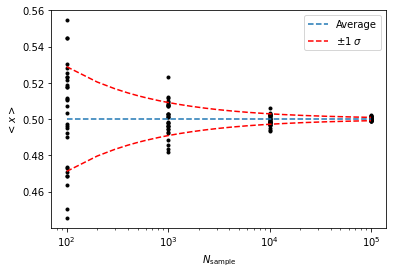

In [ ]:
n_samples = 100, 1_000, 10_000, 100_000
for attmpt in range(30):
  average = []
  for n in n_samples:
    x = np.random.uniform (size=n)
    average.append (np.mean(x))

  plt.plot (n_samples, average, 'k.')

plt.plot ((n_samples[0], n_samples[-1]), (0.5, 0.5), '--', label="Average")


## Superpose the theoretical standard deviation
xAxis = np.linspace(100, 100_000, 1000)
error = 1./np.sqrt(12 * xAxis)
plt.plot (xAxis, 0.5 + error, 'r--')
plt.plot (xAxis, 0.5 - error, 'r--', label="$\pm 1\ \sigma$")

plt.xscale('log')
plt.xlabel ("$N_{\mathrm{sample}}$")
plt.ylabel ("$<x>$")
plt.legend()
plt.show()

Per il teorema del limite centrale, ci aspettiamo che, fissato N, la media dei campioni si distribuisca approssimando una gaussiana con variance $\frac{1}{12N}$.

Vediamo se è vero:

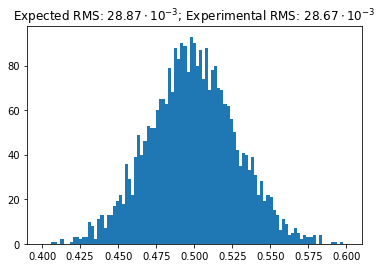

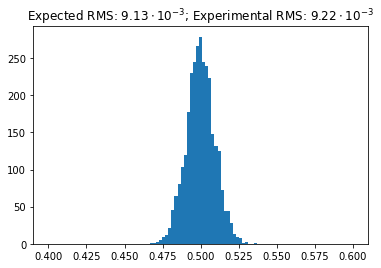

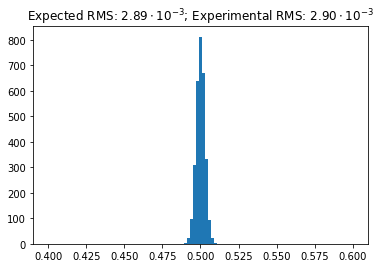

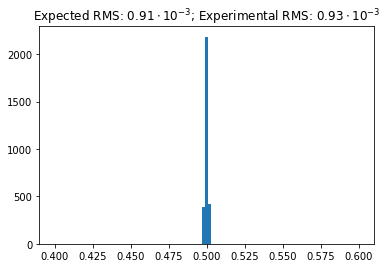

In [ ]:
n_samples = 100, 1_000, 10_000, 100_000

for n in n_samples:
  average = []
  for attmpt in range(3000):
    x = np.random.uniform (size=n)
    average.append (np.mean(x))

  plt.hist (average, bins=np.linspace(0.4, 0.6, 100))
  plt.title (f"Expected RMS: ${1e3/np.sqrt(12*n):.2f} \cdot 10^{'{-3}'}$; Experimental RMS: ${1000*np.std(average):.2f}\cdot 10^{'{-3}'}$")
  plt.show()


# Esercizio svolto: la *pdf* di un estimatore nella statistica bayesiana

Nella [statistica bayesiana](https://en.wikipedia.org/wiki/Bayesian_inference), gli stimatori vengono trattati come variabili aleatore e sono pertanto essi stessi descritti da una distribuzione di probabilità.
Questa distribuzione non rappresenta davvero la probabilità che il valore vero che si cerca di stimare assuma un valore in un certo intervallo, ma piuttosto fornisce un livello di credibilità alla nostra stima.
In questo esercizio svolto, vediamo l'esempio della determinazione della probabilità che dal lancio di una moneta nel gioco di testa o croce risulti testa.
La probabilità che esca testa è fissata, e non è una variabile aleatoria. L'incertezza sulla nostra stima di quella probabilità non è dovuto al fatto che quella probabilità può cambiare, ma alla nostra capacità di predirne il valore sulla base dei dati sperimentali.

Ai fini del nostro esempio, consideriamo una moneta che ha una probabilità $p$ di fornire come risultato "*testa*". Poiché i risultati nel gioco del testa o croce sono mutualmente esclusivi, la probabilità di ottenere croce sarà $(1-p)$.

Questa distribuzione prende il nome di [*distribuzione di Bernoulli*](https://it.wikipedia.org/wiki/Distribuzione_di_Bernoulli).

Matematicamente, diciamo che la probabilità di ottenere *testa* dato un certo valore di $p$ è
$$P (\mathit{head}) | p) = p$$

## Domanda 1.
> Applicare il teorema di Bayes per scrivere la probabilità di $p$ dato il risultato sperimentale "*testa*"

Applicando il teorema di Bayes possiamo scrivere che
$$ P(p|\mathit{head}) = \frac{P(\mathit{head} | p)P(p)}{P(\mathit{head})} $$

Ora, immaginiamo di essere del tutto agnostici sul valore di $p$, quindi la distribuzione di probabilità pregressa $P(p)$ (prior) per $p$ è uniforme.
Il valore al denominatore è la probabilità che il risultato sia "testa", per qualsivoglia valore di *head*, quindi possiamo scrivere

$$P(head) = \int_0^1 P(\mathit{head}|p) \mathrm dp = \int_0^1 p \mathrm dp = \frac{1}{2}$$

Con le opportune sostituzioni possiamo allora scrivere che
$$ P(\mathrm{head}) = 2p\ P(p)$$


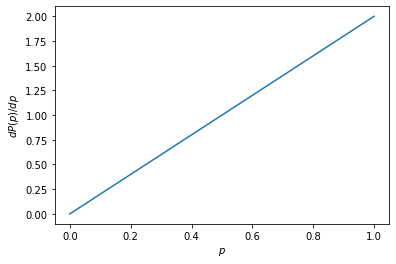

In [ ]:
pAxis = np.linspace (0, 1, 100)
plt.plot (pAxis, 2*pAxis)

plt.xlabel("$p$")
plt.ylabel("$dP(p)/dp$")
plt.show()

## Domanda 2.
> Studiare una sequenza di lanci della moneta utilizzando come *prior*, ad ogni iterazione, la funzione $P(head)$ ottenuta allo step precedente.

Possiamo a usare la funzione $P(head)$ come *prior* aggiungendo iterativamente l'informazione sulle nuove misure, moltiplicando per $p$ o $1-p$ a seconda che sia uscito testa oppure croce. Cioè moltiplicando per la probabilità dell'evento osservato dato il valore $p$, $P(head|p)$ oppure $P(tail|p)$.

Come nel caso della funzione di verosimiglianza, si ottiene quindi un prodotto di funzioni di probabilità. Proprio in virtù di questa analogia, il *posterior* definito nel contesto delle analisi bayesiane è spesso chiamato semplicemente *funzione di verosimiglianza*.

Costruiamo una funzione che prende in input una sequenza di risultati (`True` per esito "testa" e `False` per esito "croce") e aggiorniamo iterativamente la funzione verosimiglianza. Ad ogni iterazione il prior è la funzione di verosimiglianza allo step precedente.

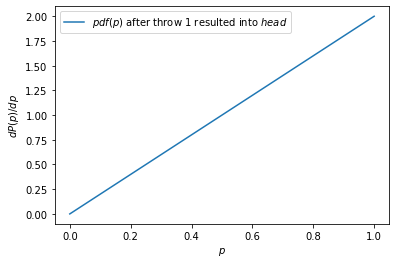

In [ ]:
def show_evolution(*results):
  p_pdf = np.ones (len(pAxis))

  for iStep, result in enumerate(results, 1):
    if result:
      p_pdf *= 2*pAxis
    else:
      p_pdf *= 2*(1-pAxis)

    plt.plot (pAxis, p_pdf,
              label=f'$\mathit{{pdf}} (p)$ after throw {iStep} resulted into ${"head" if result else "tail"}$')

  plt.xlabel("$p$")
  plt.ylabel("$dP(p)/dp$")
  plt.legend()
  plt.show()

show_evolution(True)

Con un solo lancio, abbiamo già visto che la funzione di verosimiglianza (o la *pdf* dello stimatore) è nulla a zero (cioè è impossibile che la probabilità di ottenere testa sia nulla: abbiamo appena ottenuto testa!!!) e massima ad 1, cioè la stima più ragionevole è che venga sempre testa.

Se continuando a lanciare la moneta continuiamo ad ottenere sempre testa, la nostra convinzione che ad ogni lancio uscirà sempre testa tende ad aumentare.

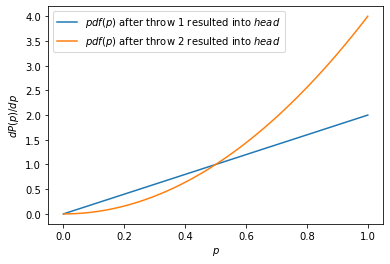

In [ ]:
show_evolution(True,True)

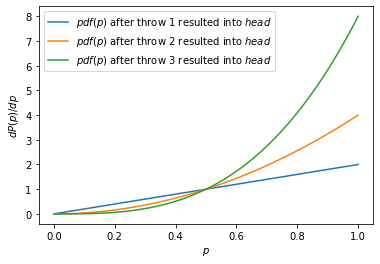

In [ ]:
show_evolution(True, True, True)

Fintanto che ad un certo punto non esce croce. E diventa impossibile che esca sempre testa, cioè che la probabilità di otterere testa sia pari a uno.

Mentre il valor massimo della funzione di verosimiglianza è proprio a 0.75, ossia 3 risultati positivi, su 4 tentativi (3/4 = 0.75)

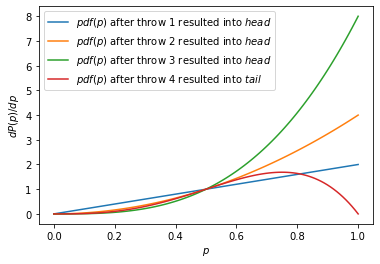

In [ ]:
show_evolution(True, True, True, False)

## Domanda 3.
> Estendere la funzione sviluppata al punto precedente per accettare in input un *prior* arbirario, e testarla con un prior che sia uniforme tra 0.2 e 0.6 e nullo altrove.


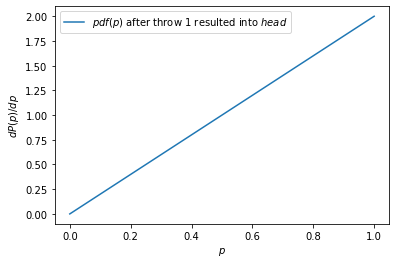

In [ ]:
def show_evolution(*results, prior=None, show_legend=True):
  pAxis = np.linspace(0, 1, 100)
  p_pdf = prior(pAxis) if prior != None else np.ones (len(pAxis))

  for iStep, result in enumerate(results, 1):
    if result:
      p_pdf *= 2*pAxis
    else:
      p_pdf *= 2*(1-pAxis)

    plt.plot (pAxis, p_pdf,
              label=f'$\mathit{{pdf}} (p)$ after throw {iStep} resulted into ${"head" if result else "tail"}$')

  plt.xlabel("$p$")
  plt.ylabel("$dP(p)/dp$")
  if show_legend:
    plt.legend()
  plt.show()

show_evolution(True)

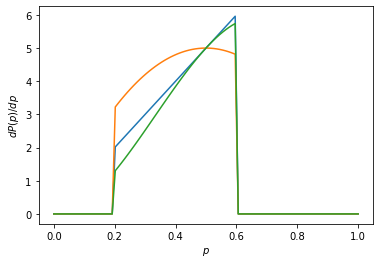

In [ ]:
def prior (p):
  return ( (p>0.2) & (p<0.6) ) / (0.6 - 0.4)

show_evolution(True, False, True, prior=prior, show_legend=False)

# Esercizi



## $p$-value di una Gaussiana

In fisica delle alte energie si misura spesso la probabilità di un evento raro in *numero di $\sigma$*. Questa convenzione proviene dal fatto che è intuitivamente più facile capire che un valore sia diverso dal valore più probabile (o dal valore atteso) per 5 volte la sua incertezza ($5 \sigma$) che non che ha una probabilità inferiore a $2.86\times10^{-7}$.

Non solo, qualunque evento con una probabilità inferiore a $2.86 \times 10^{-7}$ viene classificato, nel gergo, come un "effetto a $5\sigma$", mentre ad esempio un evento con probabilità inferiore a 1.3%, è solo un "effetto a $3\sigma$".

In questo esercizio calcoliamo questa conversione tra numero di sigma e probabilità utilizzando due approcci differenti.

### Domanda 1.
> Generare un miliardo di numeri casuali distribuiti secondo una distribuzione normale (usando la funzione [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) e contare il numero di elementi dell'array che superano 1, 2, 3, 4 e 5 deviazioni standard.

### Domanda 2.
> Integrare la gaussiana tra ciascun limite inferiore e infinito (15 sigma è abbastanza vicino a infinito) e mostrare la frazione di campioni che supera ciascuna soglia è compatibile con il valore dell'integrale entro l'errore statistico.

**Suggerimento**:
La generazione di un miliardo di elementi è un po' lenta, conviene tenerla in una cella di Jupyter dedicata, in modo da non doverla rieseguire troppo spesso mentre sviluppate e verificate il codice di selezione e conteggio.

## Geothmetic Median
Il sito web di vignette nerd `xkcd.com` ci viene talvolta in aiuto per proporre esercizi simpatici.

La settimana del 7 marzo 2021 è comparsa sul sito la seguente vignetta.

![FicinoLogo.jpg](https://imgs.xkcd.com/comics/geothmetic_meandian.png)

Premesso che **contrariamente a quanto scritto nella vignetta, è _fortemente sconsigliato_ utilizzare la Geothmetic Median a fini statistici**, si provi a implementare questo curioso algoritmo ricorsivo.

### Domanda 1
> Implementare la funzione `f` che prenda in input un numero arbitrario di argomenti e ritorni una tupla che contiene media aritmetica, media geometrica e mediana

### Domanda 2
> Implementare la funzione `gdmn` che prenda in input un numero arbitrario di argomenti ed una `tolleranza`. Prima si calcoli `f` dato il numero arbitrario degli argomenti. Se media aritmetica, media geometrica e mediana sono contenute in un intervallo inferiore alla *tolleranza*, tornare la media dei tre, altrimenti chiamare ricorsivamente `gdmn`.

Infine si verifichi il risultato presentato nella vignetta.
```
print ("Geothmetic median:", gmdn (1,1,2,3,5))
```
```
[output]

    Geothmetic median: 2.089058...
```

## Approccio bayesiano alla misura di una costante di proporzionalità

Immaginiamo di essere in procinto di analizzare i dati di un esperimento in cui eccitiamo un sensore al semiconduttore con un laser e misuriamo il segnale indotto.
Modificando la potenza del laser possiamo definire l'energia di ogni impulso del laser, espressa ad esempio in $\mu$J. L'esperimento prevede di acquisire un segnale amplificato espresso in mV che ci aspettiamo sia proporzionale all'energia dell'impulso che lo ha generato.
La costante di proporzionalità, tuttavia è incognita e deve essere determinata sperimentalmente.


### Domanda 1.
> Definire una classe `Datum` che permetta di rappresentare un singolo dato acquisito. Accederemo alla classe `Datum`:
 * al momento dell'istanziazione
 ```
 first_measurement = Datum ( <pulse energy>, <measured signal>, <uncertainty> )
 ```
 dove `<pulse energy>` è la potenza di un impulso laser espresso in $\mu$J per impulso, `<measured signal>` è il segnale amplificato ottenuto dal sensore espresso in mV, e `<uncertainty>` è l'incertezza sulla misura del segnale in tensione, espressa anch'essa in mV.
 * successivamente accedendo alle proprietà
 ```
 first_measurement.energy
 first_measurement.signal
 first_measurement.uncertainty
 ```

Si costruisca il *posterior* per i seguenti dati

| Pulse energy [$mu$J] | Measured signal [mV] | Uncertainty [mV] |
| -------------------- | -------------------- | ---------------- |
|                   1  |                  0.4 |              0.2 |
|                   2  |                  1.3 |              0.2 |
|                   3  |                  1.6 |              0.2 |

Chiamando la funzione definita al punto 2 come
```
show_evolution(
    Datum (1, 0.4, 0.2),
    Datum (2, 1.3, 0.2),
    Datum (3, 1.6, 0.2),
  )
```